In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X_train = data_train[["YearBuilt", "GarageArea", "PoolArea", "FullBath", "1stFlrSF", "2ndFlrSF"]].values
Y_train = data_train[["SalePrice"]].values

In [ ]:
X_train.shape, Y_train.shape

((1460, 6), (1460, 1))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation="sigmoid"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(14, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")   # because it is a regression problem
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

In [22]:
output = model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
46/46 [==============================] - 1s 3ms/step - loss: 39037489152.0000
Epoch 2/300
46/46 [==============================] - 0s 3ms/step - loss: 39034449920.0000
Epoch 3/300
46/46 [==============================] - 0s 3ms/step - loss: 39031775232.0000
Epoch 4/300
46/46 [==============================] - 0s 3ms/step - loss: 39029157888.0000
Epoch 5/300
46/46 [==============================] - 0s 3ms/step - loss: 39026589696.0000
Epoch 6/300
46/46 [==============================] - 0s 3ms/step - loss: 39024041984.0000
Epoch 7/300
46/46 [==============================] - 0s 4ms/step - loss: 39021490176.0000
Epoch 8/300
46/46 [==============================] - 0s 4ms/step - loss: 39018967040.0000
Epoch 9/300
46/46 [==============================] - 0s 3ms/step - loss: 39016435712.0000
Epoch 10/300
46/46 [==============================] - 0s 2ms/step - loss: 39013912576.0000
Epoch 11/300
46/46 [==============================] - 0s 3ms/step - loss: 39011405824.0000
Epoch 12

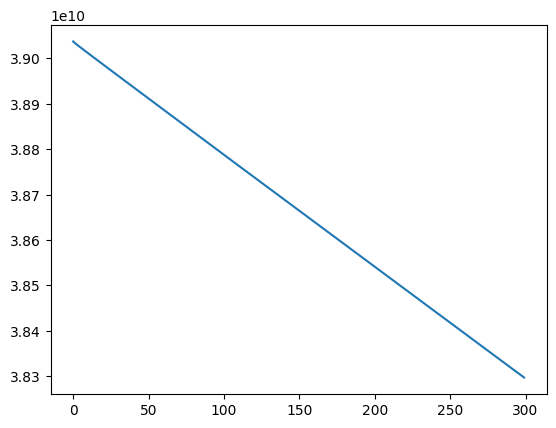

In [24]:
plt.plot(output.history["loss"])
plt.show()